#Astroseizmologija

Vaja za zimsko šolo FMF, marec 2021

Seznam poglavij:

 - [Spoznajmo se s signali](#spoznajmo-signale)
 - [Fourierova transformacija in spekter](#fourier)
 - [Analiza astroseizmoloških signalov](#seizmologija)


## Spoznajmo se s signali
<a id='spoznajmo-signale'></a>

V tej vaji se bomo spoznali z osnovnimi principi digitalnih signalov in njihovo analizo. V prvem delu , preden pridemo do resničnih astroseizmoloških signalov, bomo delali s sinusnimi signali. Sinusni signal lahko zapišemo kot

$$f(t)=\sin \left( \frac{2 \pi t}{P} \right)$$

kjer je $t$ čas, $f(t)$ je vrednost signala ob času $t$, $P$ pa je perioda signala. Narišimo zgornjo funkcijo:


In [14]:
# Ta del kode naloži nekaj knjižnic (standardnih programov), na primer za 
# risanje grafov (matplotlib) in za numerične operacije in funkcije (numpy) in 
# nastavi nekaj parametrov. 
# Na tak način se začne tipičen računalniški program, s čimer se danes ne bomo 
# ukvarjali.
%matplotlib inline
from ipywidgets import interactive, Label, Layout, FloatSlider
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = (20, 10)
from IPython.display import Audio
from astropy.io import fits


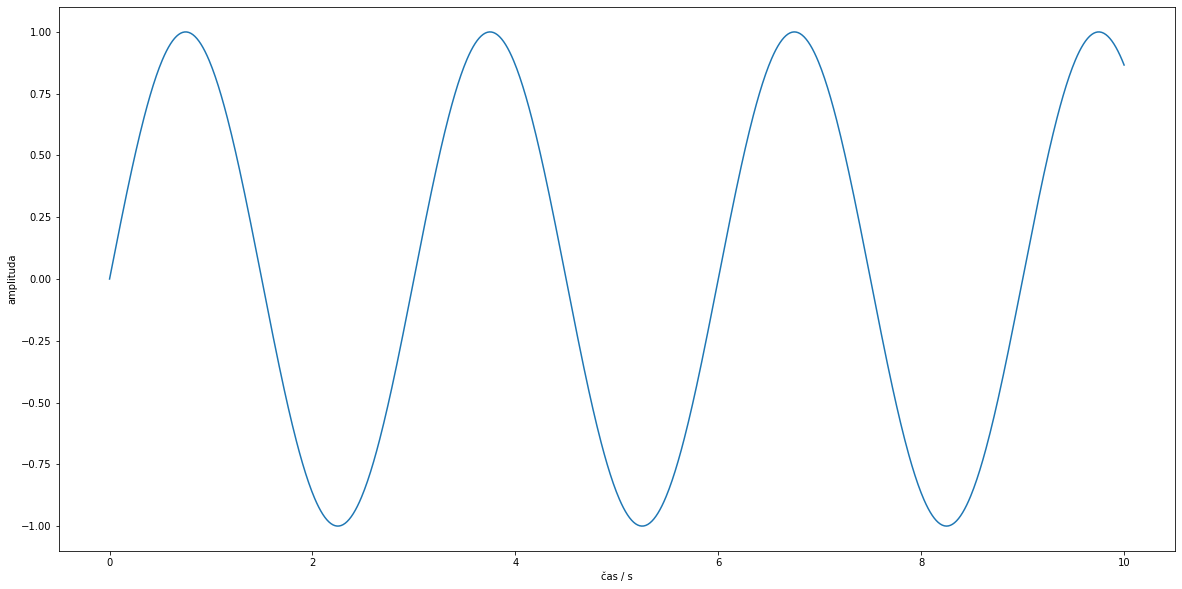

In [15]:
# Narišimo naš signal

# izberemo periodo (enote so na primer sekunde)
perioda=3

# izberemo območje časa na katerem bomo narisali signal (v tem priemru 10 s)
t=np.linspace(0,10,1000)

# narišemo signal (np.sin(2*np.pi*t/perioda) v odvisnosti od časa (t))
plt.plot(t, np.sin(2*np.pi*t/perioda))

# označimo osi
plt.xlabel('čas / s')
plt.ylabel('amplituda')

# prikažemo graf
plt.show()

Narisali smo matematično funkcijo sinus. Taka funkcija lahko predstavlja nek signal, vendar matematične funkcije niso tipičen način beleženja signala. Če je signal zabeležen kot matematična funkcija, takemu signalu pravimo analogni signal. Tak je signal, ki predstavlja zvok na gramofonski plošči. V gramofonsko ploščo je dobesedno odtisnjena matematična funkcija, ki pa je tipično prekomplicirana, da bi jo napisali simbolno.

Signale skoraj vedno beležimo tako, da shranimo le vrednost matematične funkcije ob določenih časih. Besedo matematična funkcija uporabljamo, ker implicira, da je definirana ob vseh časih. Naš signal torej ni definiran ob vseh časih ampak le ob časih, ko smo ga pomerili. Takemu signalu rečemo digitalni signal in ker delamo z računalnikom in ne z gramofonom, bodo od sedaj naprej vsi naši signali taki. Narišimo še enkrat zgornjo sinusno funkcijo kot digitalni signal.

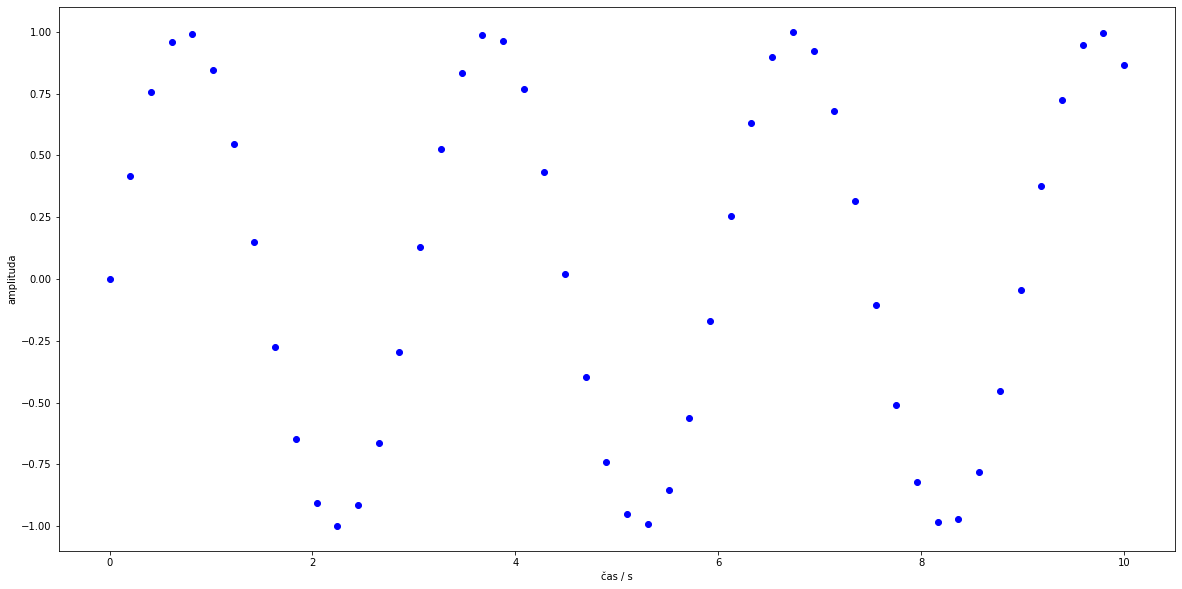

In [5]:
# Narisimo digitalni signal
perioda=3
t=np.linspace(0,10,50)
plt.plot(t, np.sin(2*np.pi*t/perioda), 'bo')
plt.xlabel('čas / s')
plt.ylabel('amplituda')
plt.show()

Zgoraj smo narisali digitalni signal, ki je bil pomerjen oziroma vzorčen 5 krat na sekundo.

Dajmo se malo poigrat in naš sinusni signal predvajat kot zvok. Zgoraj smo definirali signale, ki imajo neslišne frekvence, zato spodaj še enkrat sprogramirajmo enako funkcijo s povsem drugačnimi frekvencami. Frekvenco lahko uporabljamo namesto periode, saj velja, da je frekvenca $\nu$

$$\nu=\frac{1}{P}.$$

Sinusna funkcija se torej prepiše v obliko

$$f(t)=\sin(2 \pi t \nu).$$

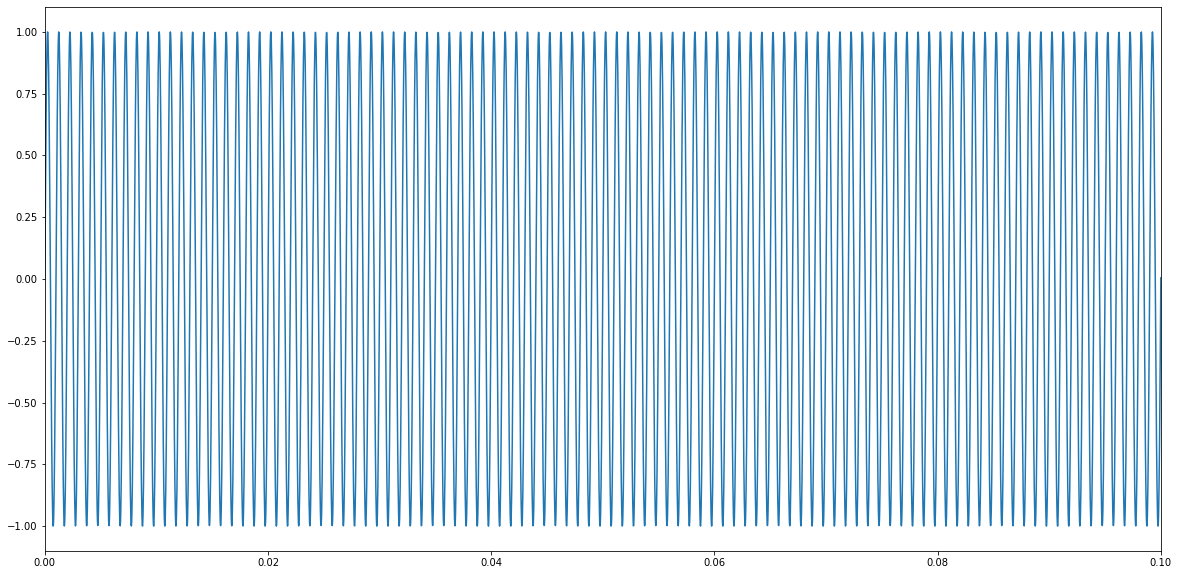

In [ ]:
# Spremenimo signal v zvok
frekvenca=1000 # v Hz
dolzina=3 # v s
sampling=44100 # vzorcenje zvoka (44100 vzorcev na sekundo je kvaliteta CD-ja)
t=np.linspace(0,dolzina,sampling*dolzina)
plt.plot(t, np.sin(2*np.pi*t*frekvenca))
plt.xlim(0,0.1) # Narisimo le prve 0.1 sekunde signala
plt.show()
Audio(np.sin(2*np.pi*t*frekvenca), rate=sampling, autoplay=True) # ta ukaz signal predvaja kot zvok

Ta signal je bil vzorčen 44100 krat na sekundo. Tudi ta signal je digitalni, vendar ga nismo narisali s pikami kot v prejšnjem primeru. V resnici bi bile pike tako majhne, da bi se zlile v eno samo črto. To v resnici vidimo na zgornjem grafu.

Bolj kompliciran signal lahko sestavimo iz sinusnih signalov z različnimi frekvencami. Sprogramirajmo še to:

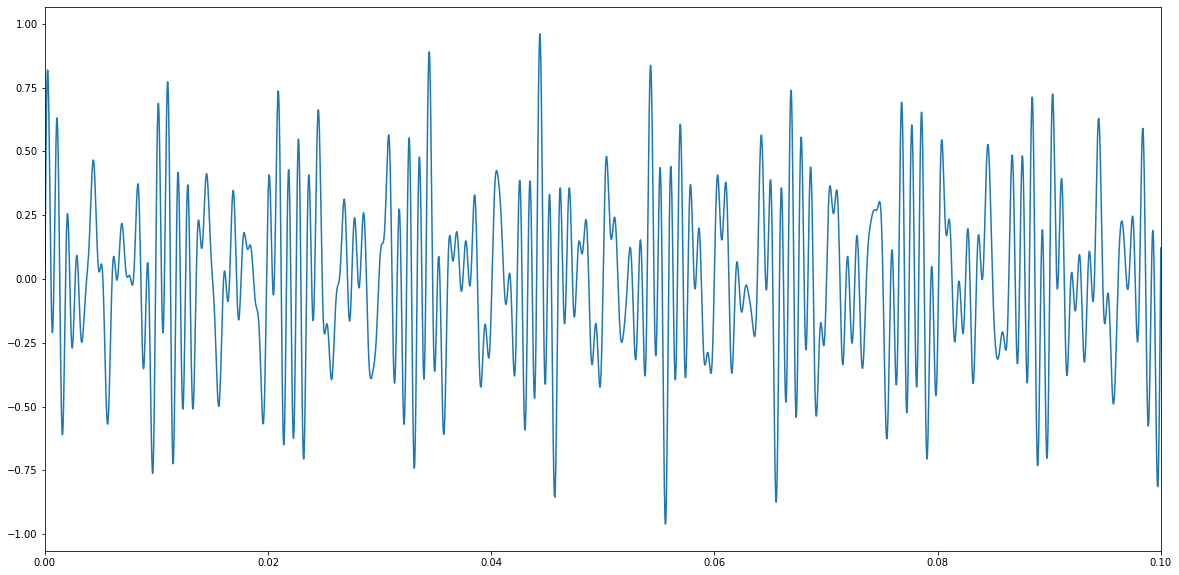

In [10]:
# Izdelajmo signal z različnimi frekvencami
frekvenca=[300,500,1020,1200,1111] # v Hz

#frekvenca=[659.25, 554.37, 440.0, 329.63, 220.0]
#frekvenca=[659.25, 523.25, 440.0, 329.63, 220.0]

dolzina=3 # v s
sampling=44100 # vzorcenje zvoka (44100 vzorcev na sekundo je kvaliteta CD-ja)

# Izracunamo signal za vsako frekvenco in jih sestejemo
signal=[]
t=np.linspace(0,dolzina,sampling*dolzina)
for i in frekvenca:
  signal.append(np.sin(2*np.pi*t*i))
signal=np.sum(np.array(signal),axis=0)/len(frekvenca)

plt.plot(t, signal)
plt.xlim(0,0.1)
plt.show()
Audio(signal, rate=sampling, autoplay=True)

Vidimo, da zdaj iz slike signala težko razberemo iz katerih frekvenc je sestavljen. Zanimivo naša ušesa (oziroma točneje možgani - uho zvok zazna, vsa analiza pa se zgodi v možganih) tovrstno analizo opravijo veliko bolje. 

Lahko se še malo poigramo z naslednjim primerom, da še bolje pokažemo kako dobro znamo analizirati valovanje, če ga lahko slišimo. Pri tem omenimo še, da ni nujno, da je cel signal sestavljen iz istih frekvenc. V naslednjem primeru imajo različni deli signala različne frekvence

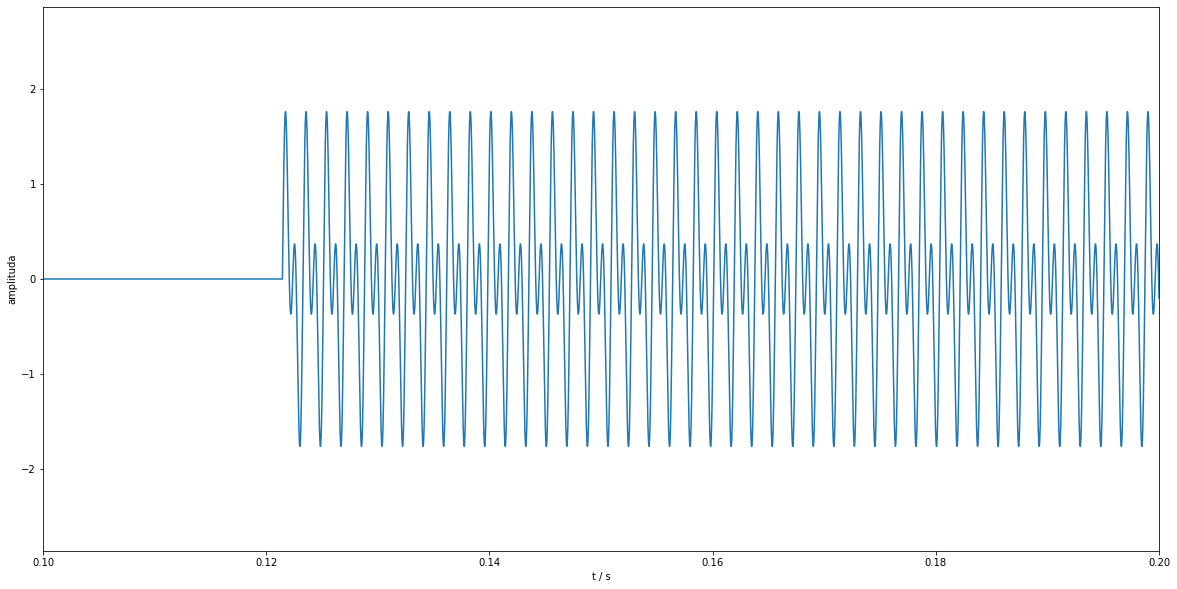

In [11]:
# Izdelajmo signal z različnimi frekvencami

sampling=44100 # vzorcenje zvoka (44100 vzorcev na sekundo je kvaliteta CD-ja)

to=np.linspace(0,0.3,int(sampling*0.3))
p=np.zeros(int(sampling*0.03))
po=np.zeros(int(sampling*0.3))
a=np.sin(2*np.pi*to*440.0)+np.sin(2*np.pi*to*220.0)
f=np.sin(2*np.pi*to*349.23)+2*np.sin(2*np.pi*to*349.23/2.)
g=np.sin(2*np.pi*to*392.0)+np.sin(2*np.pi*to*392.0/2.)
e=np.sin(2*np.pi*to*329.63)+2*np.sin(2*np.pi*to*329.63/2.)

signal=np.concatenate((po,a,p,a,p,a,p,f,f,f,f,f,f,f,f,p,po,g,p,g,p,g,p,e,e,e,e,e,e,e,e))

t=np.linspace(0,dolzina,len(signal))

plt.plot(t, signal)
plt.xlim(0.1,0.2)
plt.xlabel('t / s')
plt.ylabel('amplituda')
plt.show()
Audio(signal, rate=sampling, autoplay=True)

## Fourierova transformacija in spekter
<a id='fourier'></a>

V tem delu naloge je naš cilj ugotoviti iz katerih frekvenc je sestavljen signal. Prejšnji del vaje hočemo obrnit na glavo; namesto da bi imeli nabor frekvenc in bi iz njih sestavili signal, bomo imeli podan signal, iskali pa bomo frekvence iz katerih je sestavljen. Ta problem nam reši matematična operacija imenovana Fourierova transformacija. 

Naj bo naš signal podan kot sekvenca amplitud $f_n$. To so iste amplitude kot v signalu $f(t)$, le da ignoriramo, kaj predstavljajo časi $t$. Za poljubno vrednost $k$ lahko izračunamo sledečo vsoto 

$$ F(k)=\frac{1}{N}\sum_{n=0}^{N-1}f_n \sin\left( \frac{2 \pi k n}{N} \right),$$

kjer je $N$ število vseh točk v sekvenci $f_n$. Funkciji $F(k)$ pravimo Fourierova transformacija funkcije $f_n$, oziroma njen spekter. 

Sedaj moramo še interpretirati kaj pomeni parameter $k$. Ko iz funkcije $f(t)$ ustvarimo sekvenco $f_n$, se lahko pretvarjamo, da je to isto, kot če bi imeli funkcijo $f(t)$, ki je vzorčena na vsako sekundo. Parameter $n$ nam torej šteje sekunde od začetka signala in hkrati zaporedje vrednosti v sekvenci $f_n$. Če dobro razumemo zgornjo formulo, vidimo, da je $k$ razmerje števila vzorcev v celotnem signalu in števila vzorcev v eni periodi dolžine $P$. Na primer, če imamo signal dolg 100 točk, signalu s periodo $P=5\, \mathrm{s}$ odgovarja vrednost $k=20$. Vrednost funkcije $F(k)$ pri $k=20$ torej pove kako močno je v našem signalu zastopan sinusni signal s periodo $5\, \mathrm{s}$ ali frekvenco $0.2\, \mathrm{Hz}$. Če je signal v resnici narejen pri drugačnem vzorčenju, moramo to pretvorbo le skalirati. Torej, če bi bil naš signal vzorčen na vsake pol sekunde namesto enkrat na sekundo bi vrednost $k=20$ predstavljala zastopanost periode $P=10\, \mathrm{s}$.

Če se ti zdi zgornja razlaga prekomplicirana, se bomo s Fourierovo transformacijo spoznali v naslednjem praktičnem primeru brez rigoroznih računov. Zgornje račune v praksi le redko naredimo sami, saj so za nas že sprogramirani. V sledeči kodi Fourierovo transformacijo naredi funkcija `np.fft.rfft`. $k$-je pa v frekvence pretvori funkcija `np.fft.rfftfeq`.

V resnici je sprogramirana funkcija še bolj napredna. Če bi sledili zgornji formuli, bi morali izračunati $N^2$ členov vsote (Za $N$ različnih $k$-jev, $N$ dolgo vsoto). To bi v resnih problemih trajalo predolgo, zato se vedno poslužujemo metode imenovane hitra Fourierova transformacija, ali krajše FFT. Ta rešitev izračuna v $N \log(N)$ korakih. 

Poigrajmo se z drsniki v spodne primeru in poglejmo, kako se spremeni spekter signala, ko spreminjamo njegovo frekvenco/periodo. Poglejmo tudi, kaj se zgodi v robnih primerih, predvsem pri majhnem vzorčenju. Signal je predstavljen s točkami. Gladka krivulja je narisana le za orientacijo, da si lažje predstavljamo kakšen signal je vzorčen.

In [12]:
def sin(perioda=5, amplituda=1, samples=200):
    x=np.linspace(0,100,samples)
    y=amplituda*np.sin(x*2*np.pi/perioda)

    fig=plt.figure(1)
    ax=fig.add_subplot(211)
    x_fino=np.linspace(0,100,1000)
    y_fino=amplituda*np.sin(x_fino*2*np.pi/perioda)
    ax.plot(x_fino,y_fino, 'b-', alpha=0.2)
    ax.plot(x,y, 'bo')
    plt.xlabel('t / s')
    plt.ylabel('Amplituda')
    plt.xlim(0,100)
    
    ax=fig.add_subplot(212)
    
    n=len(y)
    freq=np.fft.rfftfreq(n, d=100./samples)

    ax.plot(freq, abs(np.fft.rfft(y)))
    ax.set_xlim(0,1)

    plt.xlabel(r'$\nu$ / Hz')
    plt.ylabel('Amplituda')
    
    plt.show()
    return x,y

w=interactive(sin, samples=(5,500,1), perioda=(2,10,1), amplituda=(0,1,0.1))
w

interactive(children=(IntSlider(value=5, description='perioda', max=10, min=2), FloatSlider(value=1.0, descrip…

Naredimo še enak račun za primer, kjer je signal sestavljen iz več različnih frekvenc. Prispevek različnih frekvenc ni nujno enak. To lahko v spodnjem primeru kontroliramo z drsniki *amplituda*.  Poigrajmo se z drsniki in poglejmo kako se spremeni spekter signala. Spet se moramo zavedati, da računalnik vidi le vzorčen signal, ne pa gladke krivulje.

In [16]:
def sin(perioda1=5, amplituda1=1, perioda2=2, amplituda2=0.5, perioda3=4.2, amplituda3=0.2):
    x=np.linspace(0,300,600)
    y=amplituda1*np.sin(x*2*np.pi/perioda1)+amplituda2*np.sin(x*2*np.pi/perioda2)+amplituda3*np.sin(x*2*np.pi/perioda3)#+2*sum*np.random.rand(600)-0.5

    fig=plt.figure(1)
    ax=fig.add_subplot(211)
    x_fino=np.linspace(0,300,3000)
    y_fino=amplituda1*np.sin(x_fino*2*np.pi/perioda1)+amplituda2*np.sin(x_fino*2*np.pi/perioda2)+amplituda3*np.sin(x_fino*2*np.pi/perioda3)
    ax.plot(x_fino,y_fino, 'b-', alpha=0.2)
    ax.plot(x,y, 'bo')
    plt.xlabel('t / s')
    plt.ylabel('Amplituda')
    plt.xlim(0,100)
    ax.set_title('Signal')
    
    ax=fig.add_subplot(212)
    
    n=len(y)
    freq=np.fft.rfftfreq(n, d=300./600.)

    ax.plot(freq, abs(np.fft.rfft(y)))
    ax.set_xlim(0,1)
    ax.set_title('Spekter')

    plt.xlabel(r'$\nu$ / Hz')
    plt.ylabel('Amplituda')
    
    plt.show()
    return x,y

w=interactive(sin, perioda1=(2,10,1), amplituda1=(0,1,0.1), perioda2=(2,10,1), amplituda2=(0,1,0.1), perioda3=(2,10,1), amplituda3=(0,1,0.1))
w

interactive(children=(IntSlider(value=5, description='perioda1', max=10, min=2), FloatSlider(value=1.0, descri…

## Analiza astroseizmoloških signalov
<a id='seizmologija'></a>


Na voljo imamo svetlobne krivulje nekaj zvezd, kot so bile opazovane s teleskopom Kepler. Shranjene so kot posamezne datoteke s končnico `.fits`. Fits format je standardni format za shranjevanje astronomksih podatkov. V spodnjem delu kode lahko izberemo eno od fits datotek, jo odpremo in narišemo svetlobno krivuljo. Seznam datotek je podan v kodi in datoteke, ki jih ne potrebujemo, pustimo zakomentirane (znak `#` na začetku vrstice). 

Svetlobna krivulja je predstavljena kot amplituda v odvisnosti od časa. Čas je podan v dnevih in celotna krivulja predstavlja več let opazovanj. Amplituda predstavlja odstopanja svetlosti zvezde od njene povprečne svetlosti. Podana je v delih na milijon (ppm - parts per million). Na primer, vrednost amplitude $- 500$ pomeni, da je bila ob tistem času zvezda $0.05\%$ temnejša kot običajno. Da bolje vidimo detajle v svetlobni krivulji, je pod celotno svetlobno krivuljo narisan še povečan del okoli dveh mesecev opazovanj. 

Kakšna zvezda ima lahko presledke v meritvah, kar je normalno, saj teleskop ni opazoval vseh zvezd neprestano. 

Svetlobne krivulje, ki jih uporabljamo v tej nalogi so že obdelane za potrebe astroseizmologije. Vzorčenje je konstantno, tako da je razdalja med vsemi točkami v vseh svetlobnih krivuljah 0.020433723 dneva (slabe pol ure). Vse prekinitve opazovanj pa so predstavljene z vrednostjo amplitude nič. Popravljeni so tudi skoki amplitude, ki bi se sicer pojavljali zaradi spremembe občutljivosti CCD detektorjev, in nihanja na časovnih skalah večjih od 55 dni.

Za šalo si svetlobne krivulje tudi zaigramo. Frekvence so seveda iz mikroherzov prestavljene v slišne frekvence, signal je pa tudi pofiltriran, da se znebimo šuma ki ni tako zanimiv kot lastne frekvence zvezd.


In [ ]:
#hdul=fits.open('podatki/hlsp_kepseismic_kepler_phot_kplr001865744-55d_kepler_v1_cor-filt-inp.fits')
#hdul=fits.open('podatki/hlsp_kepseismic_kepler_phot_kplr002010138-55d_kepler_v1_cor-filt-inp.fits')
#hdul=fits.open('podatki/hlsp_kepseismic_kepler_phot_kplr003729611-55d_kepler_v1_cor-filt-inp.fits')
#hdul=fits.open('podatki/hlsp_kepseismic_kepler_phot_kplr003731411-55d_kepler_v1_cor-filt-inp.fits')
#hdul=fits.open('podatki/hlsp_kepseismic_kepler_phot_kplr003733123-55d_kepler_v1_cor-filt-inp.fits')
#hdul=fits.open('podatki/hlsp_kepseismic_kepler_phot_kplr004249357-55d_kepler_v1_cor-filt-inp.fits')
#hdul=fits.open('podatki/hlsp_kepseismic_kepler_phot_kplr004262505-55d_kepler_v1_cor-filt-inp.fits')
#hdul=fits.open('podatki/hlsp_kepseismic_kepler_phot_kplr006024654-55d_kepler_v1_cor-filt-inp.fits')
#hdul=fits.open('podatki/hlsp_kepseismic_kepler_phot_kplr006029474-55d_kepler_v1_cor-filt-inp.fits')
#hdul=fits.open('podatki/hlsp_kepseismic_kepler_phot_kplr007509359-55d_kepler_v1_cor-filt-inp.fits')
#hdul=fits.open('podatki/hlsp_kepseismic_kepler_phot_kplr007522297-55d_kepler_v1_cor-filt-inp.fits')
#hdul=fits.open('podatki/hlsp_kepseismic_kepler_phot_kplr007529215-55d_kepler_v1_cor-filt-inp.fits')
#hdul=fits.open('podatki/hlsp_kepseismic_kepler_phot_kplr007532726-55d_kepler_v1_cor-filt-inp.fits')
#hdul=fits.open('podatki/hlsp_kepseismic_kepler_phot_kplr008110809-55d_kepler_v1_cor-filt-inp.fits')
#hdul=fits.open('podatki/hlsp_kepseismic_kepler_phot_kplr008123432-55d_kepler_v1_cor-filt-inp.fits')
#hdul=fits.open('podatki/hlsp_kepseismic_kepler_phot_kplr008125276-55d_kepler_v1_cor-filt-inp.fits')
#hdul=fits.open('podatki/hlsp_kepseismic_kepler_phot_kplr008127582-55d_kepler_v1_cor-filt-inp.fits')
#hdul=fits.open('podatki/hlsp_kepseismic_kepler_phot_kplr008143905-55d_kepler_v1_cor-filt-inp.fits')
#hdul=fits.open('podatki/hlsp_kepseismic_kepler_phot_kplr008409525-55d_kepler_v1_cor-filt-inp.fits')
#hdul=fits.open('podatki/hlsp_kepseismic_kepler_phot_kplr008410006-55d_kepler_v1_cor-filt-inp.fits')
#hdul=fits.open('podatki/hlsp_kepseismic_kepler_phot_kplr008410413-55d_kepler_v1_cor-filt-inp.fits')
#hdul=fits.open('podatki/hlsp_kepseismic_kepler_phot_kplr008410437-55d_kepler_v1_cor-filt-inp.fits')
#hdul=fits.open('podatki/hlsp_kepseismic_kepler_phot_kplr008414340-55d_kepler_v1_cor-filt-inp.fits')
#hdul=fits.open('podatki/hlsp_kepseismic_kepler_phot_kplr008414518-55d_kepler_v1_cor-filt-inp.fits')
#hdul=fits.open('podatki/hlsp_kepseismic_kepler_phot_kplr008414716-55d_kepler_v1_cor-filt-inp.fits')
#hdul=fits.open('podatki/hlsp_kepseismic_kepler_phot_kplr008415729-55d_kepler_v1_cor-filt-inp.fits')
#hdul=fits.open('podatki/hlsp_kepseismic_kepler_phot_kplr008416927-55d_kepler_v1_cor-filt-inp.fits')
#hdul=fits.open('podatki/hlsp_kepseismic_kepler_phot_kplr008738834-55d_kepler_v1_cor-filt-inp.fits')
#hdul=fits.open('podatki/hlsp_kepseismic_kepler_phot_kplr009903915-55d_kepler_v1_cor-filt-inp.fits')
#hdul=fits.open('podatki/hlsp_kepseismic_kepler_phot_kplr009903947-55d_kepler_v1_cor-filt-inp.fits')
#hdul=fits.open('podatki/hlsp_kepseismic_kepler_phot_kplr009932866-55d_kepler_v1_cor-filt-inp.fits')
#hdul=fits.open('podatki/hlsp_kepseismic_kepler_phot_kplr010517437-55d_kepler_v1_cor-filt-inp.fits')
#hdul=fits.open('podatki/hlsp_kepseismic_kepler_phot_kplr010527754-55d_kepler_v1_cor-filt-inp.fits')
#hdul=fits.open('podatki/hlsp_kepseismic_kepler_phot_kplr010552097-55d_kepler_v1_cor-filt-inp.fits')
#hdul=fits.open('podatki/hlsp_kepseismic_kepler_phot_kplr010593078-55d_kepler_v1_cor-filt-inp.fits')
#hdul=fits.open('podatki/hlsp_kepseismic_kepler_phot_kplr012304634-55d_kepler_v1_cor-filt-inp.fits')


sv_krivulja=hdul[1].data
hdul.close()
t=sv_krivulja['TIME']
y=sv_krivulja['FLUX']

fig=plt.figure(1)
ax=fig.add_subplot(211)
ax.plot(t,y,lw=0.5)
ax.axvspan(t[3000], t[6000], alpha=0.2, color='k', lw=0)
ax.text(t[3000], 2500, "povecano\nspodaj")
ax.set_xlabel('t / dnevi')
ax.set_ylabel('Amplituda / ppm')
ax.set_xlim(t[0],t[-1])

ax=fig.add_subplot(212)
ax.plot(t,y)
ax.set_xlabel('t / dnevi')
ax.set_ylabel('Amplituda / ppm')
ax.set_xlim(t[3000],t[6000])

plt.show()



n=len(y)
y_fft=abs(np.fft.rfft(y))
y_fft[y_fft<200000]=0
y_fft[:1500]=0
signal_filt=np.fft.irfft(y_fft,len(y))



Audio(signal_filt[200:-200], rate=20100, autoplay=True)

FileNotFoundError: ignored

Sedaj nas čaka glavni del naloge, da narišemo spekter zvezdnih oscilacij in ga analiziramo. 

Zanimata nas dva parametra:
 * Frekvenca pri kateri so lastna nihanja zvezde najmočnejša.
 * Razmik med lastnimi frekvencami za sosednje nihajne načine $n$.

Slednji parameter je težje izmerit kot prvega. Morali bi namreč imeti nekaj izkušenj z interpretacijo dobljenih spektrov, da bi lahko določili kateremu nihajnemu načinu pripada kakšna špica v spektru. Namesto tega bomo uporabili znano zvezo med razmikom med špicami in širino območja kjer najdemo vse nihajne načine. 

Preko območja na spektru kjer se nahajajo nihajni načini zvezde bomo poveznili gaussovsko krivuljo. Ta krivulja dobro opisuje t.i. ovojnico spektra lastnih frekvenc zvezde. Spreminjamo lahko pozicijo krivulje v spektru in njeno širino (in višino - parameter, ki za nas ni pomemben). V kodi je že sprogramirana relacija med razmikom med špicami in širino ovojnice, tako da razmik, ki nas zanima, kar preberemo iz drsnika, ki sicer spreminja širino. 

In [ ]:
def gauss(amplituda=2000000, razmik=20, pozicija=100):
    fig=plt.figure(1)
    ax=fig.add_subplot(111)
    ax.plot(freq, y_fft)
    ax.set_title('Spekter')

    plt.xlabel(r'$\nu$ / $\mu$Hz')
    plt.ylabel('Amplituda')
    ax.set_xlim(0.1,250)

    x=np.linspace(0.1,250,1000)
    if razmik<51.3:
        sigma=0.217*razmik**1.7624
    else:
        sigma=0.8453*razmik**1.4892
    g=amplituda*np.exp(-(x-pozicija)**2/(2*sigma**2))
    ax.plot(x,g, c='r')
    plt.show()
    return x,g

# izračunamo frekvence za diskretno fourierovo transformacijo
n=len(y)
freq=np.fft.rfftfreq(n, d=(t[1]-t[0])*24*3600/1000000)

# izračunamo Fourierovo transformacijo
y_fft=abs(np.fft.rfft(y))

z=interactive(gauss,\
              amplituda=FloatSlider(value=2000000,min=500000,max=20000000,step=100000,layout=Layout(width='800px')),\
              razmik=FloatSlider(value=10,min=1,max=30,step=0.05,layout=Layout(width='800px'), readout_format='.2f'),\
              pozicija=FloatSlider(value=100,min=1,max=250,step=0.1,layout=Layout(width='800px'), readout_format='.1f'))
z



interactive(children=(FloatSlider(value=2000000.0, description='amplituda', layout=Layout(width='800px'), max=…

Povprečna gostota zvezde ($\bar{\rho}$) je odvisna od razmika med špicami ($\Delta \nu$). To relacijo najlažje zapišemo, če jo sklairamo na vrednosti za Sonce (krogec s piko je oznaka za Sonce):

$$\frac{\bar{\rho}}{\bar{\rho}_\odot}=\left( \frac{\Delta\nu}{\Delta\nu_\odot} \right)^2$$

Od položaja vrha lastnih frekvenc ($\nu_\mathrm{max}$) pa je odvisen gravitacijski pospešek ($g$) na površju zvezde. Izkaže se, da je ta odvisen tudi od temperature zvezde ($T_\mathrm{eff}$): 

$$\frac{\bar{g}}{\bar{g}_\odot}=\frac{\nu_\mathrm{max}}{\nu_{\mathrm{max},\odot}}\left( \frac{T_\mathrm{eff}}{T_\mathrm{eff,\odot}} \right)^\frac{1}{2}$$

Temperature iz naših podatkov ne moremo izmerit in jo moramo najti v literaturi. Sicer je temperatura lastnost zvezde, ki jo njalažje izmerimo, navadno kar prek njene barve. 

Takim relacijam, ki so normirane na vrednosti za Sonce, rečemo skalirne relacije.  

Iz zgornjih dveh relacij lahko izpeljemo še maso in radij zvezde. Uporabimo definiciji gostote in gravitacijskega pospeška:

$$\bar{\rho}=\frac{3 M}{4 \pi R^3}$$

$$g=\frac{GM}{R^2},$$

kjer je $G$ gravitacijska konstanta. Pokažeš lahko, da je potemtakem:

$$\frac{R}{R_\odot}=\left(\frac{\nu_\mathrm{max}}{\nu_{\mathrm{max},\odot}}\right) \left( \frac{\Delta \nu_\odot}{\Delta \nu}\right)^2 \left( \frac{T_\mathrm{eff}}{T_\mathrm{eff,\odot}} \right)^\frac{1}{2}$$

$$\frac{M}{M_\odot}=\left(\frac{\nu_\mathrm{max}}{\nu_{\mathrm{max},\odot}}\right)^3 \left( \frac{\Delta \nu_\odot}{\Delta \nu}\right)^4 \left(\frac{T_\mathrm{eff}}{T_\mathrm{eff,\odot}} \right)^\frac{3}{2}.$$

Potrebujemo le še vse vrednosti za Sonce, ki so:

$$\nu_\mathrm{max\odot}=3.05\, \mathrm{mHz}, \qquad \Delta\nu_\odot=134.9\, \mathrm{\mu Hz}, \qquad T_\mathrm{eff, \odot}=5777\, \mathrm{K}, \qquad M_\odot=1.99\ 10^{30}\, \mathrm{kg}, \qquad R_\odot=696\,000\, \mathrm{km}.$$

In [ ]:
# Izračun zvezdnih parametrov

razmik = 8.05 # mikro Hz
pozicija = 40.1  # mikro Hz
temperatura = 4000.0 # K

razmik_sonce=134.9 # mikro Hz
pozicija_sonce= 3050.0 # mikro Hz
temperatura_sonce=5777.0 # K

gostota = (razmik / razmik_sonce)**2
gr_pospesek = (pozicija / pozicija_sonce)*(temperatura / temperatura_sonce)**0.5
radij = (pozicija / pozicija_sonce)*(razmik_sonce / razmik)**2 * (temperatura / temperatura_sonce)**0.5
masa = (pozicija / pozicija_sonce)**3 * (razmik_sonce / razmik)**4 * (temperatura / temperatura_sonce)**1.5

print(r"Radij zvezde = %s $R_\odot$" % radij)
print(r"Masa zvezde = %s $M_\odot$" % masa)
print(r"Gostota zvezde = %s $\rho_\odot$" % gostota)
print(r"Gravitacijski pospesek = %s $g_\odot$" % gr_pospesek)





Radij zvezde = 3.072242436914321 $R_\odot$
Masa zvezde = 0.10326052118323417 $M_\odot$
Gostota zvezde = 0.0035609662814780297 $\rho_\odot$
Gravitacijski pospesek = 0.010940151726377792 $g_\odot$
